Applying PCA for dimensionality reduction...
Fitting Gaussian Mixture Model...
Predicting clusters...


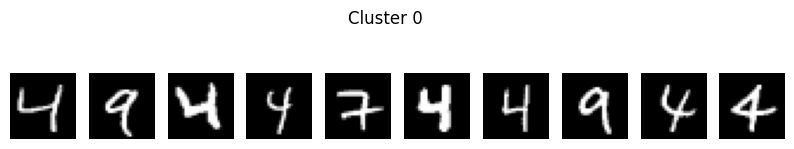

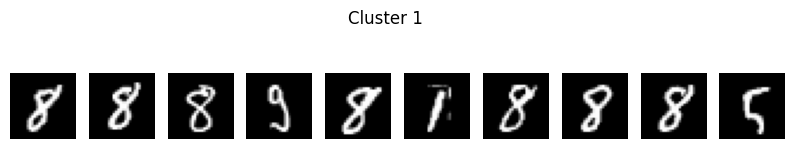

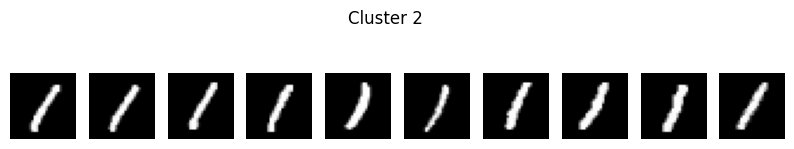

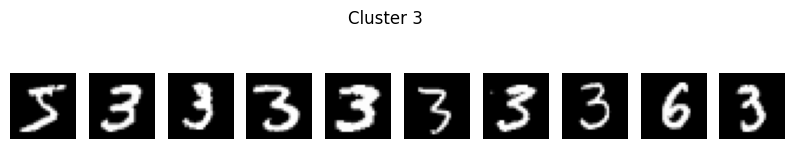

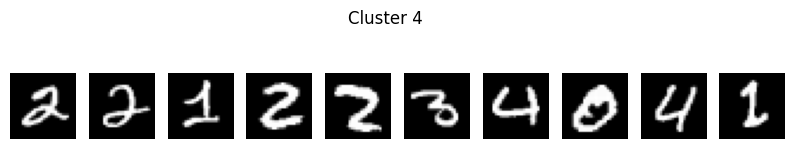

Clustering completed successfully!


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from keras.datasets import mnist

# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Use only training data for clustering
X = x_train.reshape(-1, 28*28).astype(np.float32) / 255.0  # Flatten and normalize
y = y_train.astype(int)

print("Applying PCA for dimensionality reduction...")
pca = PCA(n_components=50)
X_reduced = pca.fit_transform(X)

print("Fitting Gaussian Mixture Model...")
num_clusters = 10
gmm = GaussianMixture(n_components=num_clusters, covariance_type="full", random_state=42)
gmm.fit(X_reduced)

print("Predicting clusters...")
clusters = gmm.predict(X_reduced)

# Visualization function
def plot_cluster_images(cluster_number, num_samples=10):
    indices = np.where(clusters == cluster_number)[0][:num_samples]
    fig, axes = plt.subplots(1, num_samples, figsize=(10, 2))
    for i, idx in enumerate(indices):
        axes[i].imshow(X[idx].reshape(28, 28), cmap="gray")
        axes[i].axis("off")
    plt.suptitle(f"Cluster {cluster_number}")
    plt.show()

# Show first 5 clusters
for i in range(5):
    plot_cluster_images(i)

print("Clustering completed successfully!")

